In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')


In [6]:
train=pd.read_csv('../../../data/new/final_data_train.csv', index_col=0)
# print(train.isna().sum())
# print('***************')
# print(np.isinf(train[['총자산규모(Size)','부채비율(DEB)','자기자본비율(DEB)','매출액증가율','현금흐름(CF)','PBR']]).sum())
train

,기업명,업종명,평가연도,총자산규모,부채비율,자기자본비율,매출액증가율,현금흐름,PBR,ESG,E,S,G,배당률
0,CS홀딩스,서비스업,2011,1.887535e+11,15.95,86.25,30.53,0.070627,0.390,C,B,C,C,0.00
1,KISCO홀딩스,서비스업,2011,7.797319e+11,14.21,87.56,5.37,0.055293,0.325,C,B+,C,C,14.90
2,LG이노텍,전기전자,2011,4.409967e+12,232.87,30.04,10.95,0.063961,1.760,A,B+,A,A,0.00
3,MH에탄올,음식료품,2011,1.342069e+11,214.54,31.79,-18.64,0.003993,0.360,C,B,C,B이하,0.00
4,OCI,화학,2011,7.205013e+12,93.68,51.63,28.71,0.321332,3.025,A,A,A,A,41.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3749,후성,화학,2021,6.163344e+11,117.43,45.99,45.74,0.218873,6.010,B+,A,B,B,3.00
3750,휠라홀딩스,유통업,2021,4.288857e+12,85.95,53.78,21.26,0.138261,6.610,A,B+,A+,A,98.33
3751,휴비스,화학,2021,8.434152e+11,80.28,55.47,0.00,-0.013347,0.900,A,B+,A+,A,5.72
3752,휴스틸,철강금속,2021,9.519209e+11,51.97,65.80,68.62,0.004646,0.185,C,C,C,B,16.00


In [19]:
new_order =['업종명','평가연도','총자산규모(Size)','부채비율(DEB)','자기자본비율(DEB)','매출액증가율','현금흐름(CF)','PBR','ESG','E','S','G','배당률']
train = train.reindex(columns=new_order)

In [20]:
train.columns=['업종명','평가연도','총자산규모','부채비율','자기자본비율','매출액증가율','현금흐름','PBR','ESG','E','S','G','배당률']
train.dropna(axis=0,inplace=True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3752 entries, 0 to 3753
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   업종명     3752 non-null   object 
 1   평가연도    3752 non-null   int64  
 2   총자산규모   3752 non-null   float64
 3   부채비율    3752 non-null   float64
 4   자기자본비율  3752 non-null   float64
 5   매출액증가율  3752 non-null   float64
 6   현금흐름    3752 non-null   float64
 7   PBR     3752 non-null   float64
 8   ESG     3752 non-null   object 
 9   E       3752 non-null   object 
 10  S       3752 non-null   object 
 11  G       3752 non-null   object 
 12  배당률     3752 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 410.4+ KB


In [22]:
train.describe()

,평가연도,총자산규모,부채비율,자기자본비율,매출액증가율,현금흐름,PBR,배당률
count,3752.000000,3.752000e+03,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000,3752.000000
mean,2015.691898,3.234099e+12,162.172143,53.215594,19.686988,0.044816,1.711110,30.629043
std,3.064134,1.605120e+13,398.277621,21.466533,666.392403,0.205408,2.987433,101.412329
min,2011.000000,1.870297e+10,0.000000,-71.940000,-95.280000,-2.665034,-6.285000,0.000000
25%,2013.000000,2.038818e+11,40.242500,38.065000,-3.035000,0.005796,0.675000,0.000000
50%,2016.000000,4.685355e+11,85.660000,53.665000,3.135000,0.047549,1.060000,10.000000
75%,2018.000000,1.284350e+12,161.902500,71.042500,12.330000,0.093778,1.760000,27.390000
max,2021.000000,4.266212e+14,12807.680000,96.690000,40693.190000,8.732042,90.230000,3674.980000


## 종속변수 EDA

#### 배당률이 0을 제외한거

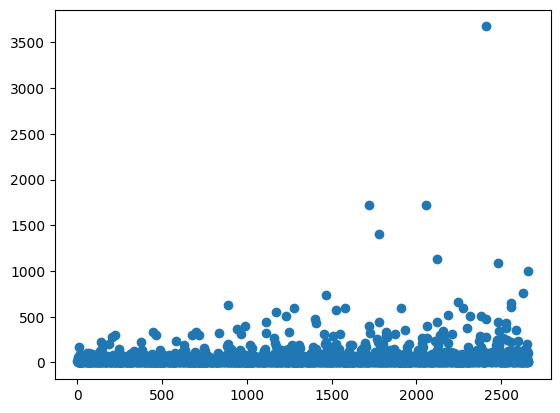

In [23]:
배당률2=train[~(train['배당률']==0)]
배당률2.reset_index(drop=True,inplace=True)
plt.scatter(배당률2.index,배당률2['배당률'])


In [24]:
배당률2

,업종명,평가연도,총자산규모,부채비율,자기자본비율,매출액증가율,현금흐름,PBR,ESG,E,S,G,배당률
0,서비스업,2011,7.797319e+11,14.21,87.56,5.37,0.055293,0.325,C,B+,C,C,14.90
1,화학,2011,7.205013e+12,93.68,51.63,28.71,0.321332,3.025,A,A,A,A,41.23
2,기계,2011,3.108793e+11,84.02,54.34,18.47,0.085562,1.160,B이하,C,B이하,C,18.58
3,서비스업,2011,3.502688e+13,136.16,42.34,27.27,0.039813,1.570,A,A+,A,C,55.70
4,유통업,2011,5.234175e+12,173.19,36.60,47.50,0.009351,1.265,B+,B+,B+,B+,9.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,화학,2021,4.526469e+12,156.66,38.96,66.54,0.074836,4.770,A,A,A+,A,997.23
2657,화학,2021,6.163344e+11,117.43,45.99,45.74,0.218873,6.010,B+,A,B,B,3.00
2658,유통업,2021,4.288857e+12,85.95,53.78,21.26,0.138261,6.610,A,B+,A+,A,98.33
2659,화학,2021,8.434152e+11,80.28,55.47,0.00,-0.013347,0.900,A,B+,A+,A,5.72


In [47]:
배당률2.sort_values('배당률',ascending=False,inplace=True)

n_row = int(len(배당률2) * 0.2)
top_20_percent = 배당률2.head(n_row)
down_20_percent= 배당률2.tail(n_row)
down_20_percent

,업종명,평가연도,총자산규모,부채비율,자기자본비율,매출액증가율,현금흐름,PBR,ESG,E,S,G,배당률
239,화학,2012,7.283050e+12,102.78,49.31,-24.73,0.004966,1.665,A,B+,A,A,7.50
1301,화학,2016,6.248555e+12,91.40,52.25,19.02,0.148806,0.695,B+,B+,A,B+,7.50
1227,화학,2015,2.086168e+11,113.93,46.74,2.10,0.096548,2.195,B+,B+,B+,B+,7.50
717,화학,2013,1.133226e+14,951.62,9.51,236.65,0.165376,1.060,B이하,D,B이하,B+,7.38
1471,종이목재,2016,1.213795e+11,28.60,77.76,13.95,0.040339,0.665,B이하,C,B이하,B이하,7.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,전기전자,2014,5.155711e+10,89.69,52.72,-1.57,-0.009327,0.765,B이하,C,B이하,B이하,0.04
1140,전기전자,2015,4.527330e+10,58.52,63.08,-10.64,0.016562,1.270,B이하,B,B이하,B이하,0.04
1435,전기전자,2016,4.411641e+10,57.38,63.54,-5.79,0.055507,4.945,B이하,C,B이하,B이하,0.03
1752,전기전자,2017,4.299199e+10,46.72,68.16,1.45,0.051261,3.660,B이하,B,B이하,B이하,0.03


In [35]:
배당률2[배당률2['배당률']<100]['배당률'].describe()

count    2464.000000
mean       23.508515
std        21.001559
min         0.030000
25%         8.560000
50%        17.810000
75%        30.645000
max        99.850000
Name: 배당률, dtype: float64

In [26]:
배당률2['배당률'].describe()

count    2661.000000
mean       43.186836
std       118.152869
min         0.030000
25%         9.190000
50%        19.450000
75%        39.200000
max      3674.980000
Name: 배당률, dtype: float64

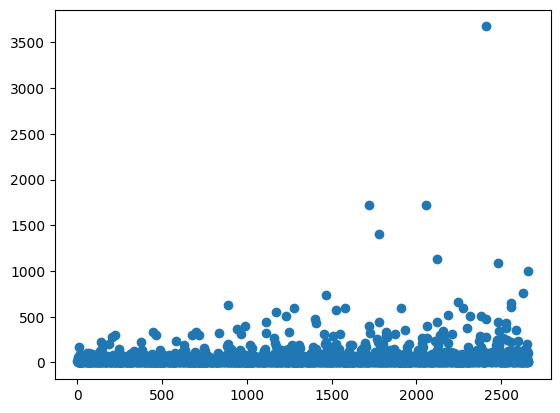

In [27]:
#plt.hist(train['배당률'])
plt.scatter(배당률2.index,배당률2['배당률'])

# 독립변수 EDA

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

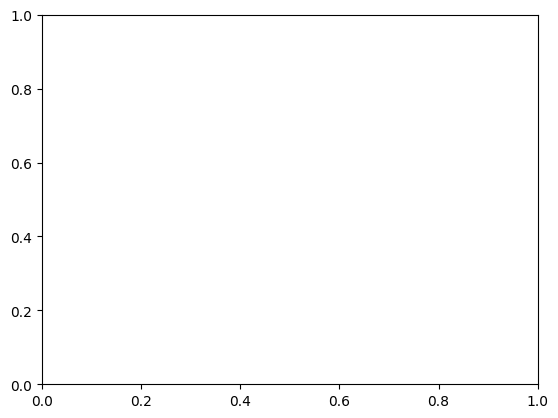

In [12]:

plt.scatter(train.index,train['부채비율'])

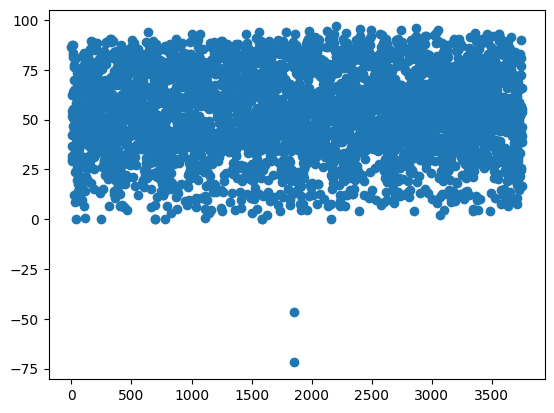

In [8]:
plt.scatter(train.index,train['자기자본비율'])

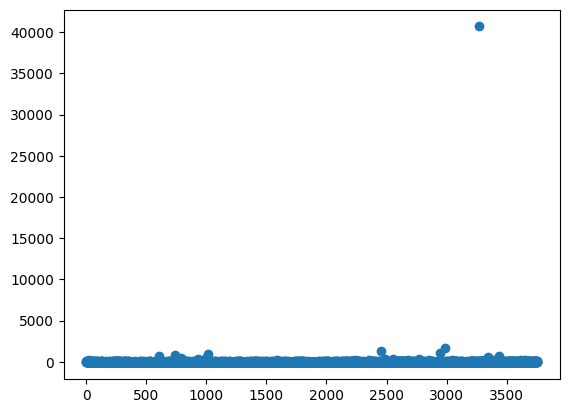

In [9]:
plt.scatter(train.index,train['매출액증가율'])

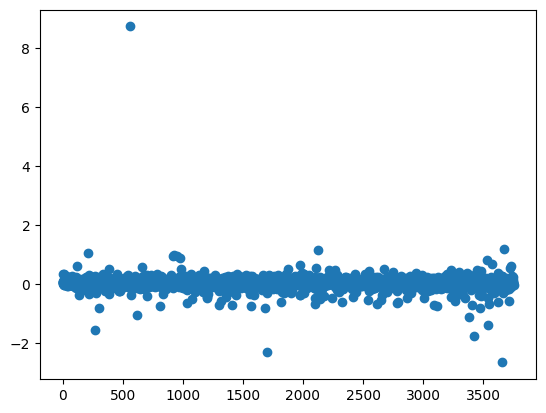

In [10]:
plt.scatter(train.index,train['현금흐름'])

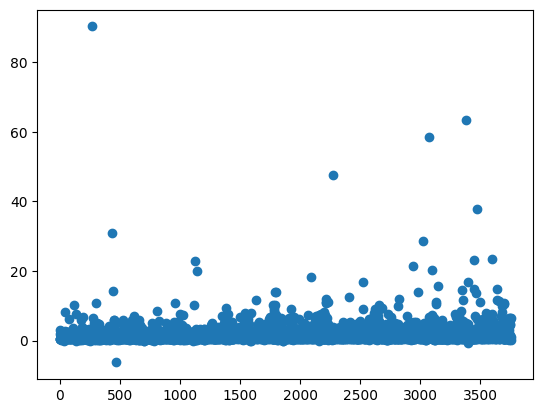

In [11]:
plt.scatter(train.index,train['PBR'])